# ML model trainning

import all library 

In [2]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

Read the datasets

In [3]:
df = pd.read_csv('news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


we are using here only one feature from datasets

In [4]:
labels = df.label

In [5]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

Mapping the Fake and Real label as 0 and 1 because of binary classification

In [6]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [7]:
for i in range(len(df)):
    corpus = []
    review = df['text'][i]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for j in review:
        if j not in stpwrds:
            corpus.append(lemmatizer.lemmatize(j))
    review = ' '.join(corpus)
    df['text'][i] = review

C:\Users\vishw\AppData\Local\Temp/ipykernel_14148/2348363969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = review


In [8]:
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(df['text'])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.3, random_state=1)

In [10]:
X_train.shape

(4434, 5000)

In [11]:
X_test.shape

(1901, 5000)

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
classifier = PassiveAggressiveClassifier()
classifier.fit(X_train,Y_train)

PassiveAggressiveClassifier()

accuracy:   0.923
Confusion matrix, without normalization


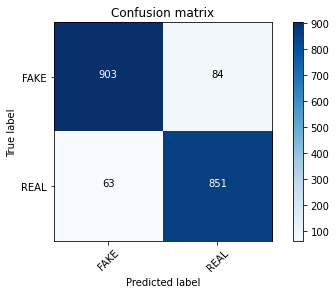

In [14]:
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [15]:
pickle.dump(classifier,open('./model.pkl', 'wb'))
pickle.dump(tfidf_v, open('./tfidf.pkl','wb'))

In [16]:
loaded_model = pickle.load(open('./model.pkl', 'rb'))
loaded_tfidf = pickle.load(open('./tfidf.pkl','rb'))

In [17]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = loaded_tfidf.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News������ ")
    else:
        print("Prediction of the News : Looking Real News������ ")

In [18]:
n = "Election 2022 LIVE Updates: With 3 CMs, 6 Union Ministers, BJP to Kick Off Campaign for Guj Phase 1 Election; AAP's MCD Poll Canvassing Begins"

In [19]:
fake_news_det(n)

Prediction of the News : Looking Real News������ 
